<center style="font-family:cursive;"><h1 style="font-size:200%; padding: 10px; background: #001f3f;"><b style="color:orange;">ABOUT NOTEBOOK</b></h1></center>


<p style="font-size:150%;">The objective of this Notebook is to predict the sentiment of the drug Users, according to their reviews and various other features like the condition they are suffering from, the rating of the drug used, Date of the usage, and others.</p>

<h1 style="font-size:180%; color:navy;"><i><b>Steps Performed</b></i></h1>

<ul>
    <li style="font-size:150%;">DESCRIPTIVE STATISTICS</li>
    <li style="font-size:150%;">DATA VISUALIZATION</li>
    <li style="font-size:150%;">DATA PREPROCESSING & FEATURE ENGINEERING</li>
    <li style="font-size:150%;">LIGHT GBM MODEL BUILDING</li>
</ul>

<h1 style="font-size:180%; color:navy;"><i><b>About Dataset</b></i></h1>

<ul>
    <li style="font-size:150%;">The Drug Review Dataset is taken from the UCI Machine Learning Repository. This Dataset provides patient reviews
on specific drugs along with related conditions and a 10-star patient rating reflecting the overall patient satisfaction. The data was obtained by crawling online pharmaceutical review sites. The Drug Review Data Set is of shape (161297, 7) i.e. It has 7 features including the review and 161297 Data Points or entries. </li>
    <li style="font-size:150%;">The features are 'drugName' which is the name of the drug, 'condition' which is the condition the patient is suffering from, 'review' is the patients review, 'rating' is the 10-star patient rating for the drug, 'date' is the date of the entry and the 'usefulcount' is the number of users who found the review useful. </li>
    <li style="font-size:150%;">Here the sentiment of the review is the target variable that needs to be predicted. here we can notice that the sentiment of any review is not given, so we have to give the sentiment to the rating first and then use it as the target variable. </li>
</ul>

<h1 style="font-size:200%; color:navy;"><i><b>Import Required Libraries and Load Dataset</b></i></h1>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('drugsComTest_raw.csv')
test = pd.read_csv('drugsComTest_raw.csv')
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [3]:
# as both the dataset contains same columns we can combine them for better analysis

data = pd.concat([df, test])
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


<h1 style="font-size:200%; color:navy;"><i><b>Descriptive Statistics</b></i></h1>

In [4]:
# describing the data

data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [5]:
# taking out information from the data

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [6]:
# get the datatype of columns

data.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [7]:
# checking if the data contains any NULL values

data.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

<center style="font-family:cursive;"><h1 style="font-size:200%; padding: 20px; background: #001f3f;"><i><b style="color:orange;">DATA VISUALIZATION</b></i></h1></center>

<h1 style="font-size:180%; color:orange;"><i><b>VISUALIZATION OF DRUG NAMES / RATINGS / CONDITIONS</b></i></h1>

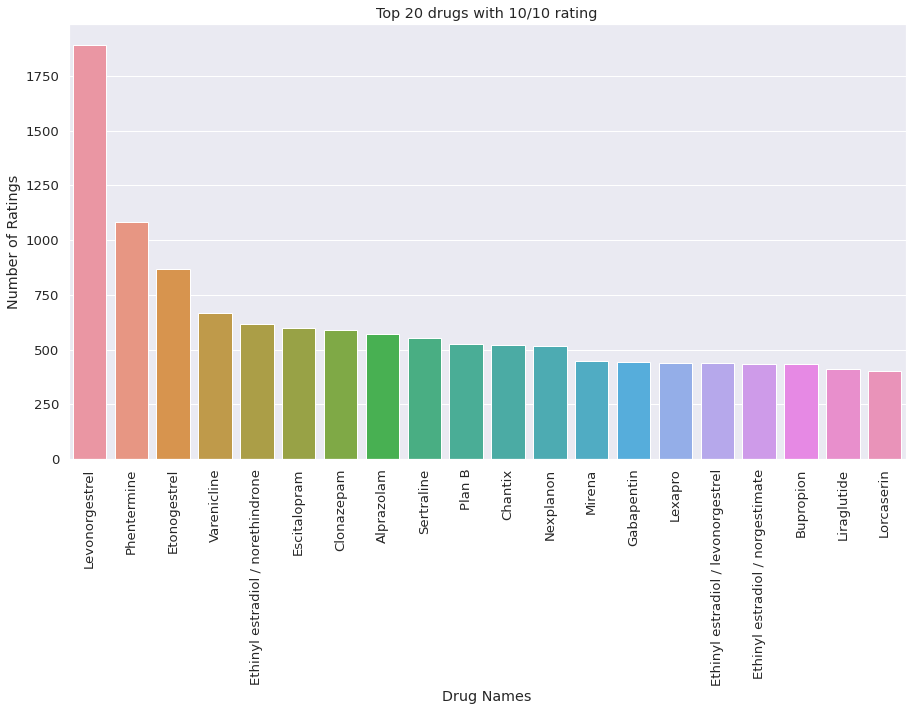

In [9]:
# This barplot shows the top 20 drugs with the 10/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

<ul>
    <li style="font-size:150%;">The is a bar graph which shows the top 20 drugs given in the data set with a rating of 10/10. 'Levonorgestrel' is the drug with the highest number of 10/10 ratings, about 1883 Ratings in the data set for 'Levonorgestrel'. </li>
<ul>

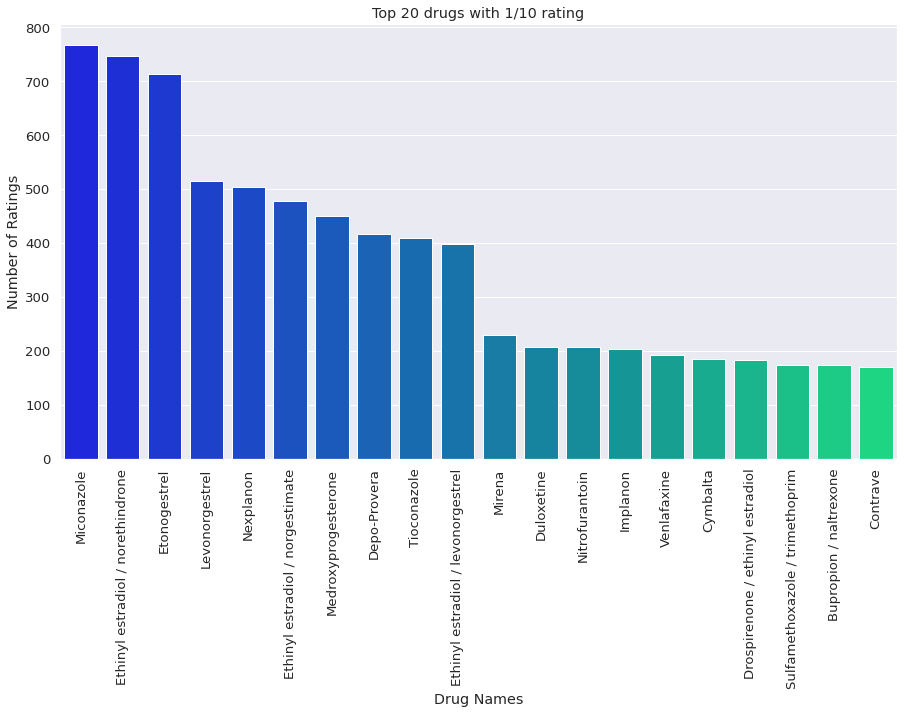

In [10]:
# This barplot shows the Top 20 drugs with the 1/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

<ul>
    <li style="font-size:150%;">The is a bar graph thatshows the top 20 drugs given in the data set with a rating of 1/10. 'Miconazole' is the drug with the highest number of 1/10 ratings, about 767. </li>
<ul>

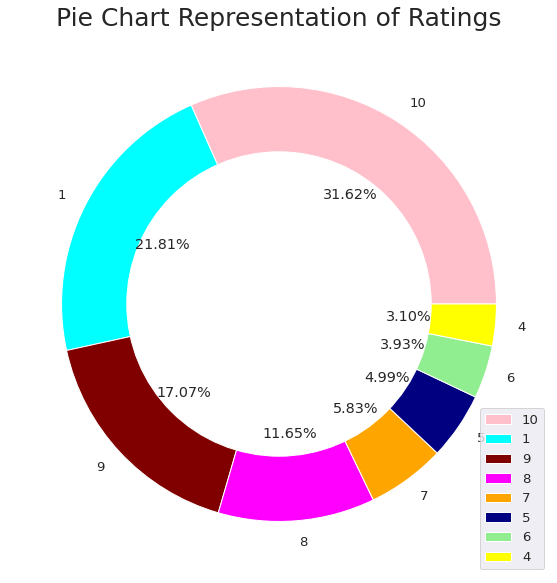

In [11]:
# making a donut chart to represent share of each ratings

size = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow']
labels = "10", "1", "9", "8", "7", "5", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

<ul>
    <li style="font-size:150%;">This Pie Chart reprents the Rating of Reviews. </li>
<ul>

<ul>
    <li style="font-size:150%;">The shows a distribution plot on the right hand side and a bar graph of the same on the left hand side. This shows the distribution of the ratings from 1 to 10 in the data set.</li>
<ul>

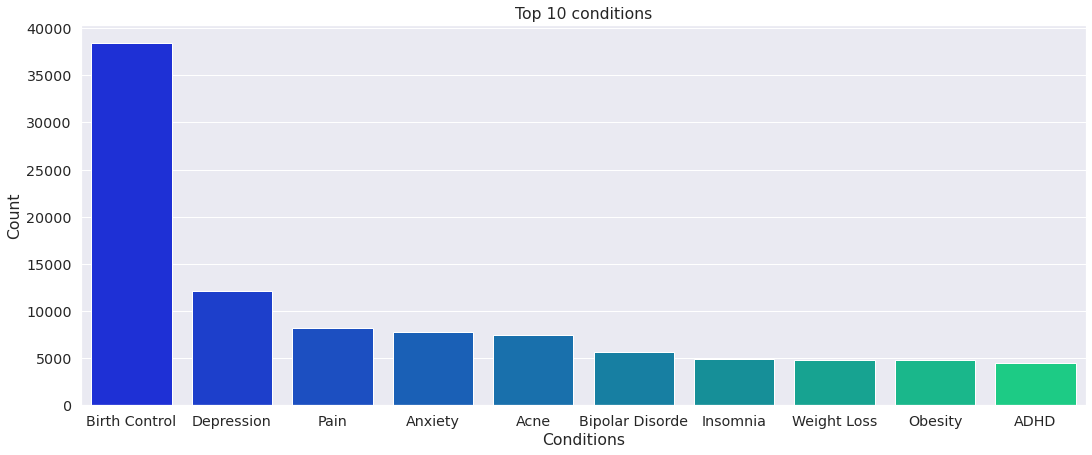

In [13]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

<ul>
    <li style="font-size:150%;">The is a bar graph which exhibits the top 10 conditions the people are suffering from. In this data set 'Birth Control' is the most prominent condition by a very big margin followed by Depression and pain.</li>
<ul>

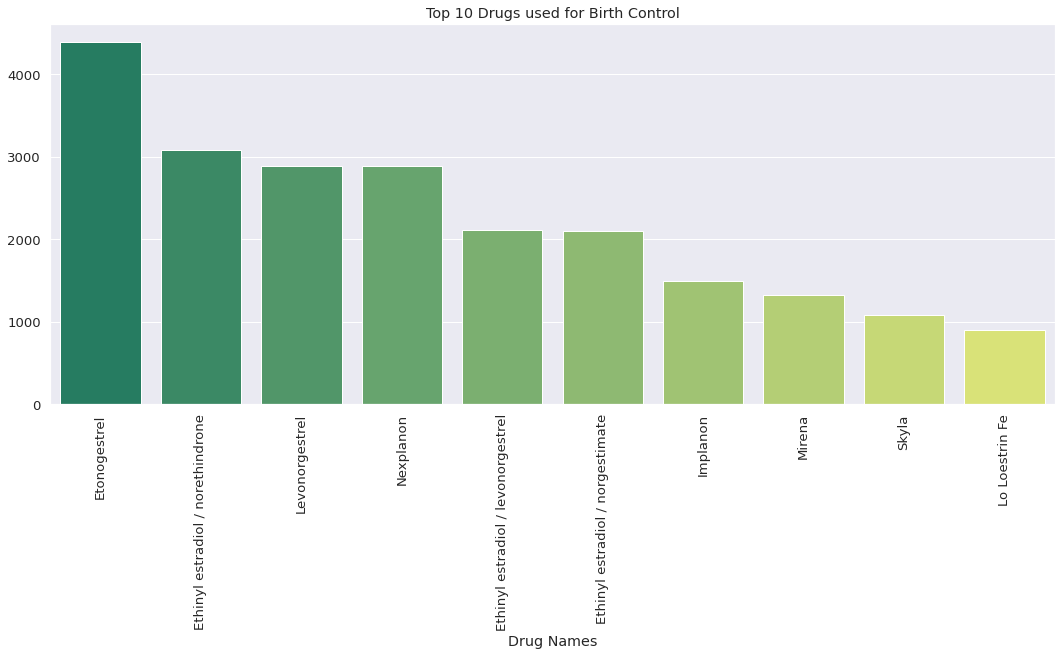

In [14]:
# Top 10 drugs which are used for the top condition, that is Birth Control
df1 = data[data['condition'] == 'Birth Control']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90);

<ul>
    <li style="font-size:150%;">The is a bar graph which exhibits the top 10 drug names for the people suffering from Birth Control. In this data set 'Etonogestrel' is the most prominent drug by a very big margin.</li>
<ul>

<h1 style="font-size:180%; color:orange;"><i><b>VISUALIZATION OF REVIEWS</b></i></h1>

In [16]:
# feature engineering 
# let's make a new column review sentiment 

data.loc[(data['rating'] >= 5), 'Review_Sentiment'] = 1
data.loc[(data['rating'] < 5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

1.0    161491
0.0     53572
Name: Review_Sentiment, dtype: int64

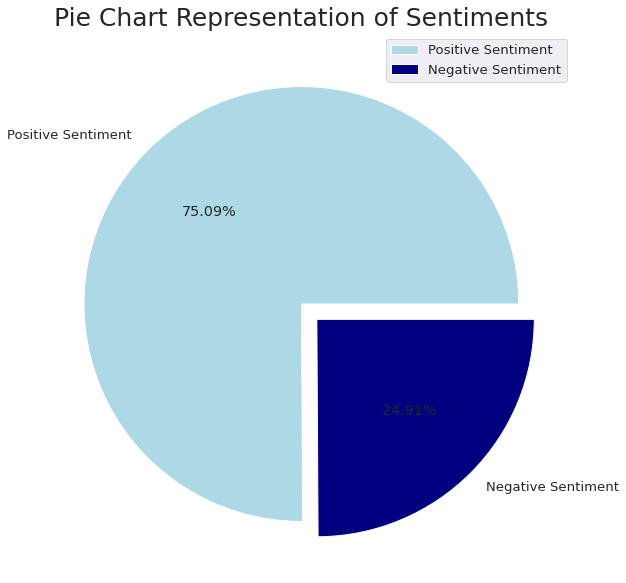

In [17]:
# a pie chart to represent the sentiments of the patients

size = [161491, 53572]
colors = ['lightblue', 'navy']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

<ul>
    <li style="font-size:150%;">This Pie Chart represents the Sentiments of the Reviews.</li>
<ul>

<h1 style="font-size:180%; color:orange;"><i><b>VISUALIZATION OF REVIEWS BASED ON DATETIME</b></i></h1>

In [20]:
# converting the date into datetime format
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')

# now extracting year from date
data['Year'] = data['date'].dt.year

# extracting the month from the date
data['month'] = data['date'].dt.month

# extracting the days from the date
data['day'] = data['date'].dt.day

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


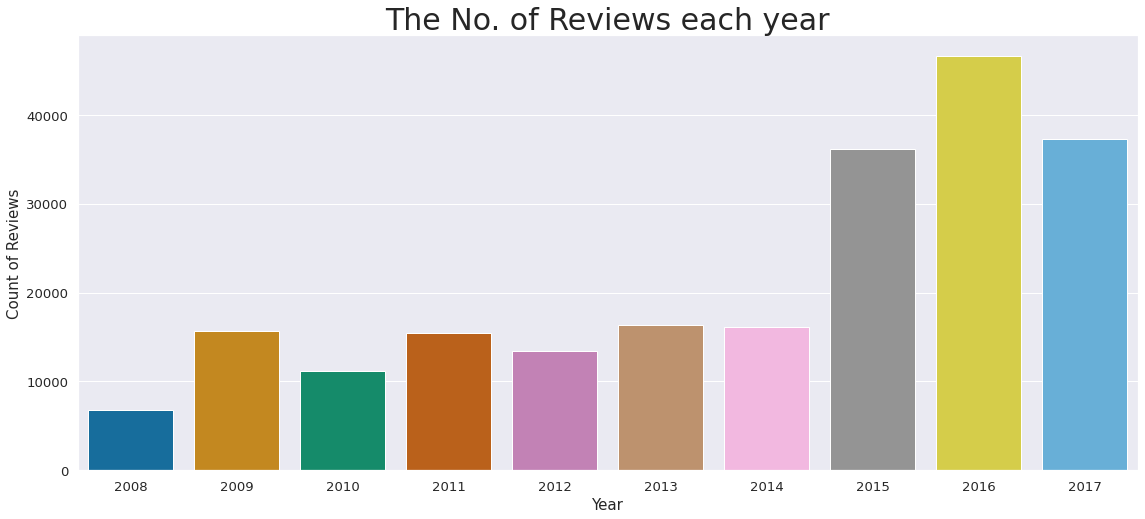

In [21]:
# looking at the no. of reviews in each of the year

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(data['Year'], palette ='colorblind')
plt.title('The No. of Reviews each year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

<ul>
    <li style="font-size:150%;">The is a Bar graph that shows the number of reviews in the data set per year. It can be inferred that most ratings are given in 2016 and 2008 has the least number of reviews.</li>
<ul>

<center style="font-family:cursive;"><h1 style="font-size:200%; padding: 20px; background: #001f3f;"><i><b style="color:orange;">DATA PREPROCESSING / FEATURE ENGINEERING</b></i></h1></center>

In [1]:
import pandas as pd

# Load your dataset
data = pd.read_csv('drugsComTest_raw.csv')

# Fill missing values using median imputation
data.fillna(data.median(numeric_only=True), inplace=True)

# Check for any remaining missing values
print("Remaining missing values:", data.isnull().sum().sum())

Remaining missing values: 295


In [3]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features to scale
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler and apply it to the numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print("Features after scaling:")
print(data.head())

Features after scaling:
   uniqueID         drugName                     condition  \
0  0.706585      Mirtazapine                    Depression   
1  1.344228       Mesalamine  Crohn's Disease, Maintenance   
2  0.645884          Bactrim       Urinary Tract Infection   
3 -1.150358         Contrave                   Weight Loss   
4 -0.277820  Cyclafem 1 / 35                 Birth Control   

                                              review    rating       date  \
0  "I&#039;ve tried a few antidepressants over th...  0.920225  28-Feb-12   
1  "My son has Crohn&#039;s disease and has done ...  0.311429  17-May-09   
2                      "Quick reduction of symptoms"  0.615827  29-Sep-17   
3  "Contrave combines drugs that were used for al...  0.615827   5-Mar-17   
4  "I have been on this birth control for one cyc...  0.615827  22-Oct-15   

   usefulCount  
0    -0.165589  
1    -0.303815  
2    -0.690850  
3     0.193801  
4    -0.663204  


In [5]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler and scale the features to a range of 0 to 1
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print("Features after Min-Max scaling:")
print(data.head())

Features after Min-Max scaling:
   uniqueID         drugName                     condition  \
0  0.704913      Mirtazapine                    Depression   
1  0.888882       Mesalamine  Crohn's Disease, Maintenance   
2  0.687400          Bactrim       Urinary Tract Infection   
3  0.169159         Contrave                   Weight Loss   
4  0.420899  Cyclafem 1 / 35                 Birth Control   

                                              review    rating       date  \
0  "I&#039;ve tried a few antidepressants over th...  1.000000  28-Feb-12   
1  "My son has Crohn&#039;s disease and has done ...  0.777778  17-May-09   
2                      "Quick reduction of symptoms"  0.888889  29-Sep-17   
3  "Contrave combines drugs that were used for al...  0.888889   5-Mar-17   
4  "I have been on this birth control for one cyc...  0.888889  22-Oct-15   

   usefulCount  
0     0.023182  
1     0.017914  
2     0.003161  
3     0.036881  
4     0.004215  


<h1 style="font-size:180%; color:orange;"><i><b>CORRELATION MATRIX</b></i></h1>

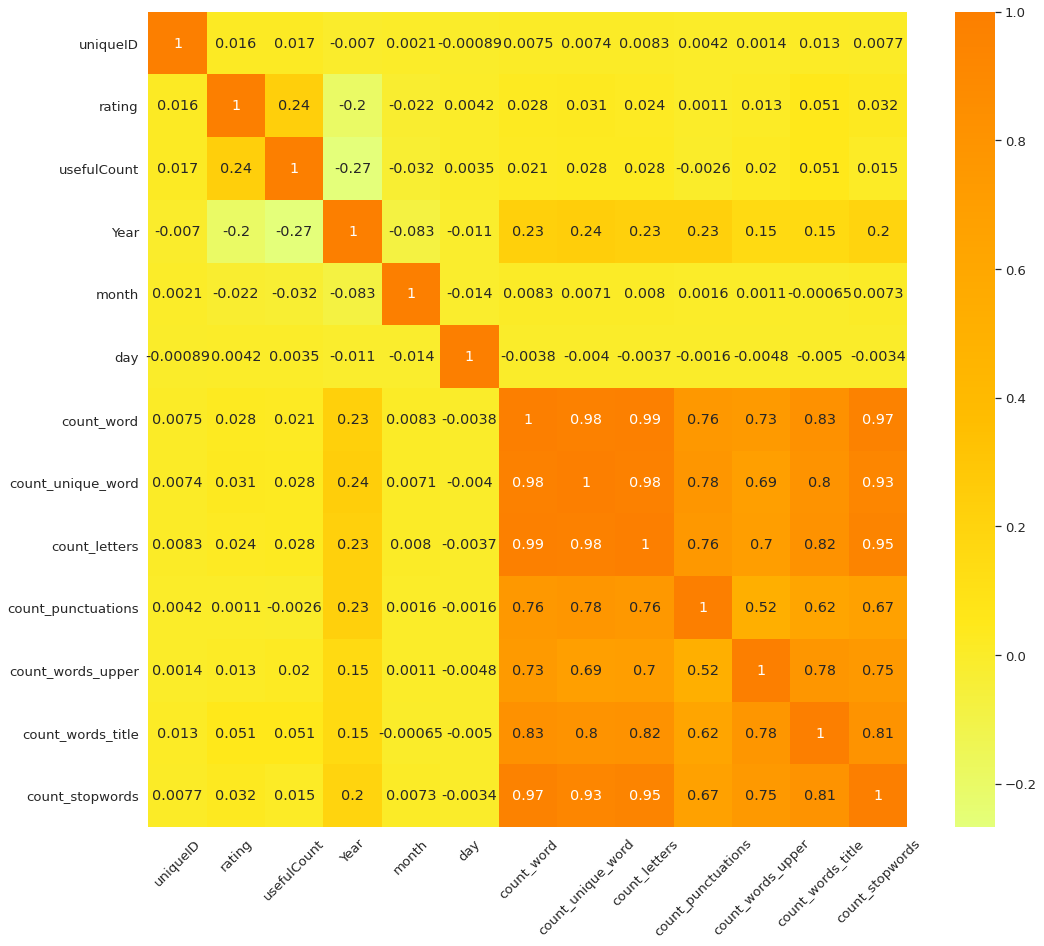

In [37]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'Wistia')
plt.setp(sns_.get_xticklabels(), rotation = 45);

<h1 style="font-size:180%; color:orange;"><i><b>LIGHT GBM MODEL</b></i></h1>

In [39]:
# Importing Libraries for the Machine Learning Model
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [40]:
# Defining Features and splitting the data as train and test set

features = data[['condition', 'usefulCount', 'sentiment', 'day', 'month', 'Year',
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = data['Review_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (149708, 15)
The Test set size  (64161, 15)


<ul>
    <li style="font-size:150%;">70% of the dataset is used for the training and the rest of the data i.e. 30% is used for the testing purpose. The shape of the training set is (149708, 15) and the shape of  the test set is (64161, 15).</li>
<ul>

In [41]:
# Training Model - I
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.9014977946104331
The confusion Matrix is 


array([[11753,  4321],
       [ 1999, 46088]])

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load and preprocess the dataset
df = pd.read_csv('drugsComTest_raw.csv')  # Update path if needed
df = df.dropna(subset=['review', 'rating'])
df['review'] = df['review'].apply(lambda x: re.sub(r'&[#0-9a-z]+;', '', str(x)))

# Convert ratings into a binary sentiment label: positive (rating >= 7) or negative (rating < 7)
df['label'] = df['rating'].apply(lambda x: 1 if x >= 7 else 0)

# Separate the data by class for balanced splitting
majority_class = df[df.label == 0]
minority_class = df[df.label == 1]

# Perform a balanced split
majority_train, majority_test = train_test_split(majority_class, test_size=0.2, random_state=42)
minority_train, minority_test = train_test_split(minority_class, test_size=0.2, random_state=42)

# Combine majority and minority sets for training and testing
train_balanced = pd.concat([majority_train, minority_train])
test_balanced = pd.concat([majority_test, minority_test])

# Separate features and target variable
X_train = train_balanced['review']
y_train = train_balanced['label']
X_test = test_balanced['review']
y_test = test_balanced['label']

# Transform text data using TF-IDF
tfidf = TfidfVectorizer(max_features=100)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Define models to evaluate
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),

}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Equal Training and Testing Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)

Random Forest - Equal Training and Testing Accuracy: 0.7546
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.39      0.52      3666
           1       0.75      0.94      0.84      7088

    accuracy                           0.75     10754
   macro avg       0.77      0.67      0.68     10754
weighted avg       0.76      0.75      0.73     10754

Confusion Matrix:
 [[1425 2241]
 [ 398 6690]]
--------------------------------------------------


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load and preprocess data
drug_data = pd.read_csv('drugsComTest_raw.csv')
drug_data = drug_data.dropna(subset=['condition'])
label_encoder = LabelEncoder()
drug_data['condition_encoded'] = label_encoder.fit_transform(drug_data['condition'])

# TF-IDF Vectorization with reduced max_features
tfidf = TfidfVectorizer(max_features=500)  # Reduced features to 500
X_text = tfidf.fit_transform(drug_data['review']).toarray()

# Convert TF-IDF matrix to DataFrame and ensure all column names are strings
X_text_df = pd.DataFrame(X_text)
X_text_df.columns = X_text_df.columns.astype(str)

# Combine the TF-IDF DataFrame with the encoded condition column
X = pd.concat([X_text_df, drug_data['condition_encoded'].reset_index(drop=True)], axis=1)
X.columns = X.columns.astype(str)  # Ensure all column names are strings
y = drug_data['rating']

# Subsample the data
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.5, random_state=42)  # Use 50% of data

# Train-test split on the subsample
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Logistic Regression Model
logistic_regression_model = LogisticRegression(max_iter=100, random_state=42)
logistic_regression_model.fit(X_train, y_train)
y_pred = logistic_regression_model.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.31569104170562934
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       693
           2       0.00      0.00      0.00       253
           3       0.00      0.00      0.00       212
           4       0.00      0.00      0.00       176
           5       0.00      0.00      0.00       272
           6       0.00      0.00      0.00       207
           7       0.00      0.00      0.00       320
           8       0.00      0.00      0.00       624
           9       0.00      0.00      0.00       902
          10       0.32      1.00      0.48      1688

    accuracy                           0.32      5347
   macro avg       0.03      0.10      0.05      5347
weighted avg       0.10      0.32      0.15      5347



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels